In [4]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

In [6]:
votes = [[2, 0], [7, 0], [20, 0], [50, 5], [100, 17]]

In [1]:
def posterior_upvote_ratio(upvotes: int, downvotes: int, samples: int = 20000):
    N = upvotes + downvotes
    upvote_ratio = pm.Uniform("upvote_ratio", 0, 1)
    observation = pm.Binomial("obs", N, upvote_ratio, value=upvotes, observed=True)
    
    map_ = pm.MAP([upvote_ratio, observation])
    map_.fit()
    mcmc = pm.MCMC([upvote_ratio, observation])
    mcmc.sample(samples, samples // 4)
    return mcmc.trace("upvote_ratio")[:]

 [-----------------100%-----------------] 20000 of 20000 complete in 0.5 sec
The scores:  [0.3575034658594372, 0.6909226507080402, 0.8688176079566436, 0.822551532448409, 0.7903265045342835]


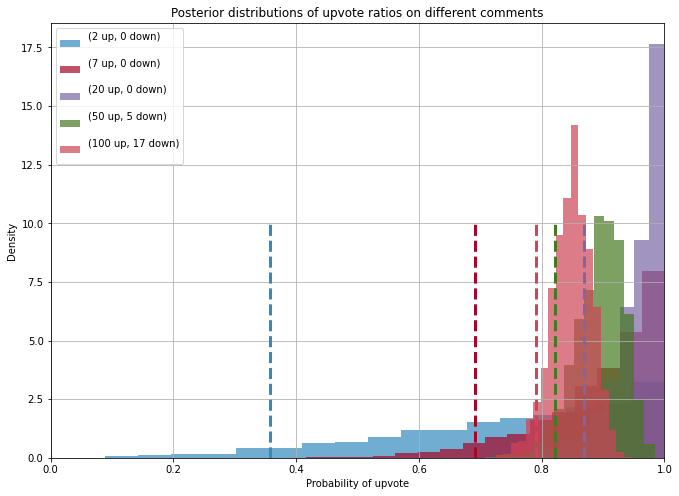

In [13]:
plt.figure(figsize=(11, 8))
posteriors = []
scores = []  # 取 5 分位点
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457"]

for i, (upvotes, downvotes) in enumerate(votes):
    label = f"({upvotes} up, {downvotes} down)\n"
    color = colors[i]
    trace = posterior_upvote_ratio(upvotes, downvotes)
    posteriors.append(trace)
    plt.hist(trace, bins=18, density=True, alpha=0.7, histtype="stepfilled", 
             color=color, lw=3, label=label)
    
    v = np.quantile(trace, 0.05)
    scores.append(v)
    plt.vlines(v, 0, 10, color=color, linestyles="--", linewidths=3)
    
plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.xlabel("Probability of upvote")
plt.ylabel("Density")
plt.title("Posterior distributions of upvote ratios on different comments")
plt.grid()

print("\nThe scores: ", scores)

In [18]:
def intervals(up: int, down: int):
    a, b = 1 + up, 1 + down
    mean = a / (a + b)
    std_err = 1.65 * np.sqrt(a * b / ((a + b) ** 2 * (a + b + 1)))
    return mean, std_err

In [15]:
for i in range(len(votes)):
    mean, std_err = intervals(*votes[i])
    print(f"{i} - score ({scores[i]:.4f}), approx ({mean - std_err:.4f})")

0 - score (0.3575), approx (0.4305)
1 - score (0.6909), approx (0.7249)
2 - score (0.8688), approx (0.8829)
3 - score (0.8226), approx (0.8282)
4 - score (0.7903), approx (0.7948)


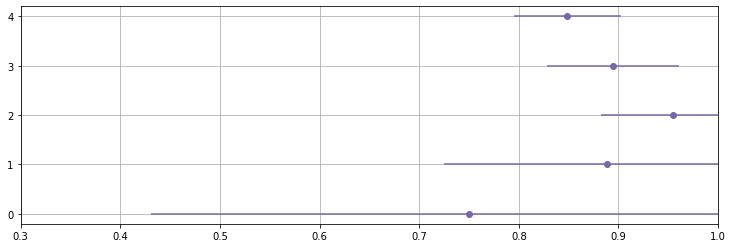

In [24]:
votes = np.array(votes)
mean, std_err = intervals(votes[:, 0], votes[:, 1])

plt.figure(figsize=(12.5, 4))
plt.errorbar(mean, np.arange(len(votes)), xerr=std_err, capsize=0, fmt="o", color="#7A68A6")
plt.xlim(0.3, 1)
plt.yticks(np.arange(len(votes)))
plt.grid()